In [20]:
## data preparation and random forest model training + prediction
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
df = pd.read_json ('./partial_dank_cleaned.json')
df['subreddit']

0       r/dank_meme
1       r/dank_meme
2       r/dank_meme
3       r/dank_meme
4       r/dank_meme
           ...     
5577        r/memes
5578        r/memes
5579        r/memes
5580        r/memes
5581        r/memes
Name: subreddit, Length: 5582, dtype: object

In [22]:
# common labels from vgg - image content, to combine, found by searching most common words with functions in next cell
animals = ['animals','Chihuahua', 'Sussex_spaniel','Scotch_terrier','white_wolf','teddy','Pomeranian','pug','Pekinese',
          'golden_retriever','grey_whale','platypus','Great_Dane','borzoi','toy_terrier','Egyptian_cat','jellyfish',
          'Siamese_cat','Persian_cat','Indian_cobra','tiger_cat','eel','brown_bear','wire-haired_fox_terrier',
          'Bouvier_des_Flandres','proboscis_monkey','goose','cabbage_butterfly','tailed_frog','American_egret',
          'goose','sea_snake','tiger','ice_bear','goldfish','Lakeland_terrier','weasel',
          'Labrador_retriever','tabby','house_finch','grey_fox','Siberian_husky','leafhopper','traffic_light',
          'Boston_bull','king_penguin','beaver','Samoyed','Saint_Bernard','Arabian_camel','ibex','guinea_pig',
          'Kerry_blue_terrier','badger','bloodhound']

formatted = ['formatted','book_jacket', 'comic_book', 'web_site', 'scoreboard', 'menu', 'notebook','jigsaw_puzzle',
            'crossword_puzzle']

tech = ['tech','hand-held_computer','computer_keyboard','remote_control','iPod','joystick','microphone','television',
       'printer','refrigerator','cellular_telephone','laptop','oscilloscope','CD_player','stethoscope',
       'desktop_computer','analog_clock','screen','projector','tape_player','soap_dispenser','sewing_machine',
       'photocopier','vending_machine','Polaroid_camera']

sports = ['sports','basketball', 'golf_ball','ping-pong_ball','unicycle','racket','volleyball','ski','tricycle',
          'ballplayer']

violent = ['violent','bulletproof_vest','revolver','assault_rifle','rifle','power_drill']

vehicle = ['vehicle','airship','garbage_truck','golfcart', 'tractor','forklift'] 

mask = ['mask','ski_mask','oxygen_mask','gasmask'] 

uniforms = ['uniforms','suit','academic_gown','jersey','lab_coat']

In [23]:
## the following functions can be used to sort the categorical attributes (vgg identified image content and processed
## words from imaged)

# function counts occurrences of certain words in feature (to identify the most common)
def getCategoryCounts(all_features):
    common_categories = []; counts = []
    for f1 in all_features:
        for row in f1:
            if (common_categories.count(row) == 0):
                common_categories.append(row); counts.append(1)
            else:
                counts[common_categories.index(row)] += 1
    return common_categories, counts

# returns the most common categories
def commonCategoriesPlotObj(common_categories, counts):
    counts_to_plot = [max(counts)]; categories_to_plot = [common_categories[counts.index(max(counts))]]
    for i in range(0,60):
        # eliminate the maximum count from the list
        counts = list(filter((max(counts)).__ne__, counts))
        common_categories = list(filter((common_categories[counts.index(max(counts))]).__ne__, common_categories))
        # if it is not already stored, store the next maximum in the plot lists
        if (categories_to_plot.count(common_categories[counts.index(max(counts))]) == 0):
               counts_to_plot.append(max(counts)); categories_to_plot.append(common_categories[counts.index(max(counts))])
    return counts_to_plot, categories_to_plot

# function combines features (parameter) with the categories found
def combineTerms(feature,list_):
    f = list(feature) 
    for i in range(0,len(list_)):
        consider = list_[i]
        for j in range(0,len(consider)):
            while (f.count(consider[j]) > 0):
                f[f.index(consider[j])] = consider[0]
    return f

# test functions / get vars for the vgg identified image content
list_ = [animals,uniforms,vehicle,formatted,sports,violent,tech]
f1 = combineTerms(df['vgg_feature_1'],list_); f2 = combineTerms(df['vgg_feature_2'],list_); f3 = combineTerms(df['vgg_feature_3'],list_)
common_categories, counts = getCategoryCounts([f1,f2,f3])
counts_to_plot, categories_to_plot = commonCategoriesPlotObj(common_categories,counts)

In [24]:
# one-hot encode it
def oneHotEncode(f1, categories_to_plot):
    hot_encoded = []
    for i in range(0,len(f1)):
        hot_encoded.append([0,0,0,0,0,0,0,0])
        for j in range(0,len(categories_to_plot[0:8])):
            if (f1[i] == categories_to_plot[j]) or (f2[i] == categories_to_plot[j]) or (f3[i] == categories_to_plot[j]):
                hot_encoded[i][j] = 1 
                # note: binary 0/1 could be replaced with the vgg probability
    return hot_encoded

# check and store
hot_encoded = oneHotEncode(f1,categories_to_plot)
for j in range(0,len(categories_to_plot[0:8])):
    df[categories_to_plot[j]] = [row[j] for row in hot_encoded]
df.head()

,author_x,awards,created_utc,text_from_image,words,processed_words_x,downs,id,is_nsfw,media,...,TextLength,Sentiment,formatted,tech,envelope,animals,uniforms,monitor,sports,violent
0,L71U,[],1584295514,NICE DICK\r\n,Ricardo😎NICE DICK\r\n,"[ricardo, nice, dick]",0,fj5ixk,False,https://i.redd.it/w6acm47gmvm41.jpg,...,17,0.51,1,0,0,0,0,0,0,0
1,Awesome-ness5,[],1584294841,Nvidia's calling on gaming PC owners to\r\nput...,Gamers AssembleNvidia's calling on gaming PC o...,"[gamer, assemblenvidia, call, game, owner, sys...",0,fj5bzj,False,https://i.redd.it/bqawbb5gkvm41.jpg,...,117,0.43,1,0,0,0,0,0,0,0
2,notaspop,[],1584293653,When you post a low-effort meme\r\nfor fun to ...,I mean.... Not Corona time?When you post a low...,"[mean, corona, time, post, effort, meme, peopl...",0,fj50df,False,https://i.redd.it/v5pea6wwgvm41.jpg,...,300,0.19,1,1,0,0,0,0,0,0
3,In_An_Elmo_Cult,[],1584293448,All of the internet:\r\nHe •I've seen this one...,.All of the internet:\r\nHe •I've seen this on...,"[internet, see, internet, explor, whatdo, mean...",0,fj4ycc,False,https://i.redd.it/hakptfr2gvm41.png,...,121,0.44,1,0,0,0,0,0,0,0
4,brutalsam,[],1584292201,Humans: we should prevent this virus from spre...,one day humans will be the reason of their ext...,"[human, reason, prevent, virus, spread, human,...",0,fj4m0x,False,https://i.redd.it/4apsvkjgcvm41.jpg,...,165,0.43,0,0,0,0,0,0,0,0


In [25]:
# do the same for processed words column 

list_ = [['coronavirus','corona','virus','corvid','sar','virustctu','spread'],
         ['self-reference','comment','meme','like','people','internet','post','repost','reddit'],
         ['fuck','fight','kill'],
         ['good','forgiv','good','creator','church'],
         ['politic','world','congress']]
f = combineTerms(df['processed_words_x'],list_)
common_categories1, counts1 = getCategoryCounts(f)
counts_to_plot1, categories_to_plot1 = commonCategoriesPlotObj(common_categories1,counts1)

# one-hot encode it
hot_encoded1 = []
for i in range(0,len(f)):
    hot_encoded1.append([0,0,0,0,0,0,0,0])
    for j in range(0,len(categories_to_plot1[0:8])):
        for word in f[i]:
            if (word == categories_to_plot1[j]):
                hot_encoded1[i][j] = 1 
#check
for j in range(0,len(categories_to_plot1[0:8])):
    df[categories_to_plot1[j]] = [row[j] for row in hot_encoded1]
df.columns

Index(['author_x', 'awards', 'created_utc', 'text_from_image', 'words',
       'processed_words_x', 'downs', 'id', 'is_nsfw', 'media', 'subreddit',
       'subscribers_x', 'thumbnail.height', 'thumbnail.thumbnail',
       'thumbnail.width', 'title', 'ups_x', 'url', 'avg_hue', 'avg_saturation',
       'avg_value', 'avg_redRGB', 'avg_greenRGB', 'avg_blueRGB', 'avg_tan',
       'avg_orange', 'vgg_general', 'vgg_feature_1', 'vgg1_prob',
       'vgg_feature_2', 'vgg2_prob', 'vgg_feature_3', 'vgg3_prob', 'off-white',
       'aqua', 'mustard', 'black', 'purple', 'red-brown', 'dust-brown',
       'gray-blue', 'orange', 'salmon', 'dark-green', 'pink', 'white',
       'yellow-green', 'bright-yellow', 'author_y', 'processed_words_y',
       'subscribers_y', 'ups_y', 'ups_normed', 'TextLength', 'Sentiment',
       'formatted', 'tech', 'envelope', 'animals', 'uniforms', 'monitor',
       'sports', 'violent', 'meme', 'coronavirus', 'like', 'peopl', 'time',
       'toilet', 'paper', 'virus'],
      d

In [26]:
# and for subredit
common_categories2, counts2 = getCategoryCounts([df['subreddit']])
#counts_to_plot2, categories_to_plot2 = commonCategoriesPlotObj(common_categories2,counts2)
hot_encoded = []
for i in range(0,len(df)):
    hot_encoded.append([0,0,0,0,0])
    for j in range(0,len(common_categories2)):
        if (df.iloc[i]['subreddit'] == common_categories2[j]):
            hot_encoded[i][j] = 1 
#check
for j in range(0,len(common_categories2)):
    df[common_categories2[j]] = [row[j] for row in hot_encoded1]
df.shape

(5582, 76)

In [27]:
## count nan values:
df = df.dropna(axis=0, how='any')
df.shape

(5563, 76)

In [28]:
## format labels into "dank or not" binary for randomForest classification task
import numpy as np

labels_reg = np.array(df['ups_x']); labels = []
for val in labels_reg:
    if val >= np.percentile(df['ups_x'], 90):
        labels.append(1)
    else:
        labels.append(0)
        
labels=np.array(labels)
df['dankorNot'] = labels

df_sorted = df.sort_values(by='ups_x',axis=0,ascending=False)
not_dank = df_sorted[sum(labels):len(labels)].sample(n=2*sum(labels),axis=0)
data = not_dank.append(df_sorted[0:sum(labels)])
data.shape

labels = np.array(data['dankorNot'])

In [31]:
# add all-numerical features-set, excludes target var
features = data[['created_utc','tech', 'envelope', 'monitor','uniforms','animals', 'formatted']].copy()
features['violent'] = data['violent']; features['tech'] = data['tech']; features['subscribers_x'] = data['subscribers_x']; features['avg_hue'] = data['avg_hue']; features['TextLength'] = data['TextLength'];features['Sentiment'] = data['Sentiment']; features['r/dank_meme'] = data['r/dank_meme']; features['r/dankmeme'] = data['r/dankmeme'] 
features['avg_saturation'] = data['avg_saturation']; features['avg_value'] = data['avg_value']; features['avg_redRGB'] = data['avg_redRGB']; features['off-white'] = data['off-white'];features['black'] = data['black']; features['salmon'] = data['salmon']; features['dark-green'] = data['dark-green'];features['r/me_irl'] = data['r/me_irl'] 
features['avg_saturation'] = data['avg_saturation']; features['avg_value'] = data['avg_value']; features['avg_redRGB'] = data['avg_redRGB']; features['off-white'] = data['off-white'];features['black'] = data['black']; features['r/MemeEconomy'] = data['r/MemeEconomy']; features['r/memes'] = data['r/memes']; features['thumbnail.width'] = data['thumbnail.width']
features['avg_blueRGB'] = data['avg_blueRGB']; features['avg_greenRGB'] = data['avg_greenRGB']; features['avg_tan'] = data['avg_tan']; features['aqua'] = data['aqua']; features['mustard'] = data['mustard']; features['gray-blue'] = data['gray-blue']; features['orange'] = data['orange']; features['thumbnail.height'] = data['thumbnail.height']
features['avg_orange'] = data['avg_orange']; features[ 'vgg1_prob'] = data['vgg1_prob']; features[ 'virus'] = data['virus']; features[ 'coronavirus'] = data['coronavirus']; features['purple'] = data['purple']; features['dust-brown'] = data['dust-brown']; features['bright-yellow'] = data['bright-yellow']
features[ 'meme'] = data['meme']; features[ 'like'] = data['like']; features[ 'peopl'] = data['peopl']; features[ 'time'] = data['time']; features['toilet'] = data['toilet']; features['red-brown'] = data['red-brown']; features['pink'] = data['pink']; features['yellow-green'] = data['yellow-green']

# Saving feature names for later use # Convert to numpy array
feature_list = list(features.columns)
#features = features.sample(n=sum(labels),axis=0)
features = np.array(features)
features.shape

(1677, 48)

In [32]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [33]:
# OPTIONAL: try model with over sampled data
from imblearn.over_sampling import SMOTE, ADASYN

X_resampled, y_resampled = SMOTE().fit_resample(train_features, train_labels)
train_features, train_labels = X_resampled, y_resampled

Using TensorFlow backend.


In [34]:
# OPTIONAL: scale the features, helpful for some color attributes
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
train_features = sc.fit_transform(train_features)
test_features = sc.transform(test_features)

In [40]:
# Instantiate and train model
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 900, random_state = 42)
rf = rf.fit(train_features, train_labels)

No handles with labels found to put in legend.


Mean Absolute Error: 0.44 degrees.
AUC= 0.6142502368212192


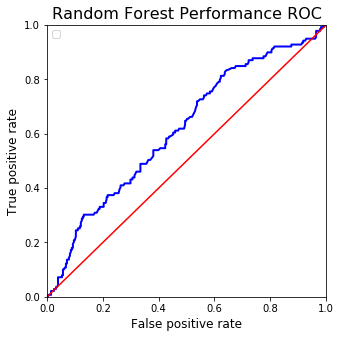

In [41]:
# Use the forest's predict method on the test data
from sklearn import metrics

predictions = rf.predict(test_features)

errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

fpr, tpr, thresholds = metrics.roc_curve(test_labels, predictions, pos_label=1, sample_weight=None)
auc = metrics.roc_auc_score(test_labels, predictions, sample_weight=None)
print("AUC=",auc)

# plot ROC curves 
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr,linewidth=2.0,color='blue')
plt.plot([0,1],[0,1],color='red')
plt.legend()
plt.xlabel('False positive rate',fontsize=12); plt.ylabel('True positive rate',fontsize=12)
plt.xlim([0,1]); plt.ylim([0,1])
plt.title('Random Forest Performance ROC', fontsize=16)
plt.show()

In [37]:
# Calculate accurancy on test set - percent of labels calculated correctly 
good = 0; bad = 0
for i in range(0,len(predictions)):
    if (predictions[i]>0.5) and (test_labels[i]==1):
        good += 1
    elif (predictions[i]<0.5) and (test_labels[i]==0):
        good += 1
    else:
        bad +=1
good/(good+bad)

0.65

In [38]:
# tree visualization code
from sklearn.tree import export_graphviz
tree = rf.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

# Get numerical feature importances
importances = list(rf.feature_importances_) # List of tuples, "variable - importance"
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)] # sort features by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# list with 0-importance features eliminated for plotting
plot_feature_importances = []
for i in range(0,len(feature_importances)):
    if (feature_importances[i][1] > 0.0):
        plot_feature_importances.append(feature_importances[i])
#check
plot_feature_importances

[('formatted', 0.1),
 ('created_utc', 0.06),
 ('subscribers_x', 0.05),
 ('TextLength', 0.05),
 ('thumbnail.height', 0.05),
 ('avg_hue', 0.04),
 ('Sentiment', 0.04),
 ('avg_saturation', 0.04),
 ('off-white', 0.04),
 ('black', 0.04),
 ('avg_tan', 0.04),
 ('vgg1_prob', 0.04),
 ('dust-brown', 0.04),
 ('red-brown', 0.04),
 ('avg_value', 0.03),
 ('avg_redRGB', 0.03),
 ('avg_blueRGB', 0.03),
 ('gray-blue', 0.03),
 ('tech', 0.02),
 ('salmon', 0.02),
 ('dark-green', 0.02),
 ('avg_greenRGB', 0.02),
 ('orange', 0.02),
 ('avg_orange', 0.02),
 ('envelope', 0.01),
 ('animals', 0.01),
 ('violent', 0.01),
 ('aqua', 0.01),
 ('mustard', 0.01),
 ('yellow-green', 0.01)]

Text(0.5, 0, 'Importance')

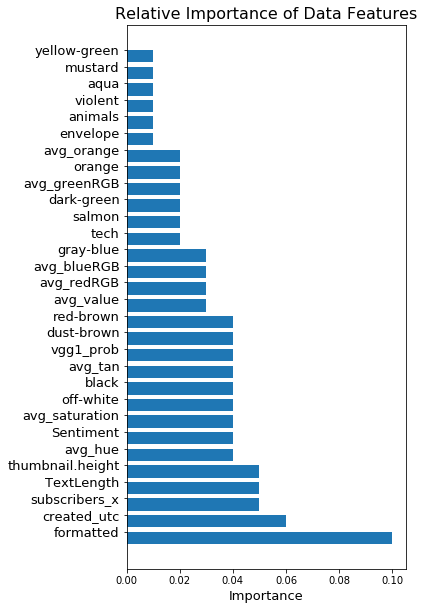

In [39]:
# display feature importance on plot
x = []; y = []
for i in range(0, len(plot_feature_importances)):
    x.append(plot_feature_importances[i][0])
    y.append(plot_feature_importances[i][1])

fig, ax = plt.subplots(figsize=(5,10))
width = 0.75
ind = np.arange(len(y))
plt.barh(ind,y,width)
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False,fontsize=13)
plt.title('Relative Importance of Data Features',fontsize=16)
plt.xlabel('Importance',fontsize=13)

In [93]:
# self-note, importing with homebrew "brew install graphviz" 
from graphviz import Source
from sklearn import tree
from IPython.display import SVG

# display tree #1
feature_names=feature_list
graph = Source( tree.export_graphviz(rf, out_file=None, feature_names=feature_names))
SVG(graph.pipe(format='svg'))

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.